# Importing essential Liberaries

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from fuzzywuzzy import process

C:\Users\sarth\AppData\Local\Programs\Python\Python311\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [4]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [5]:
%matplotlib inline

In [6]:
def fuzzymatching(Causes,Cause_list):
    d1={}
    for item,match,index in process.extract(Causes,Cause_list,limit=2):
        if match>=95:
            d1[Causes]=item
        else: 
            continue
    print(d1)
        

# Data Cleaning

In [7]:
suicides=pd.read_csv("C:\\Users\\sarth\\Downloads\\Suicides in India 2001-2012.csv\\Suicides in India 2001-2012.csv")
suicides.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [8]:
suicides.dtypes #CHECKING DATA-TYPES.

State        object
Year          int64
Type_code    object
Type         object
Gender       object
Age_group    object
Total         int64
dtype: object

In [9]:
suicides.isnull().any().sum() #CHECKING FOR NULL VALUES.

0

In [10]:
np.product(suicides.shape) #FINDING OUT TOTAL NUMBER OF RECORDS.

1662633

In [11]:
suicides.drop_duplicates() #REMOVING DUPLICATE RECORDS IF ANY.

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
...,...,...,...,...,...,...,...
237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189


In [12]:
suicides.duplicated().sum() #DUPLICATE RECORDS DELETED.

0

# Exploratory Data Analysis

In [13]:
suicides.describe() #EDA

,Year,Total
count,237519.000000,237519.000000
mean,2006.500448,55.034477
std,3.452240,792.749038
min,2001.000000,0.000000
25%,2004.000000,0.000000
50%,2007.000000,0.000000
75%,2010.000000,6.000000
max,2012.000000,63343.000000


In [14]:
suicides.loc[suicides.Total.idxmax()].transpose() #Where is the max(Total)

State        Total (All India)
Year                      2012
Type_code        Social_Status
Type                   Married
Gender                    Male
Age_group               0-100+
Total                    63343
Name: 209783, dtype: object

In [15]:
suicides.Age_group.unique() #FINDING OUT CATEGORICAL VARIABLES IN AGE GROUP COLUMN.

array(['0-14', '15-29', '30-44', '45-59', '60+', '0-100+'], dtype=object)

In [16]:
suicides.loc[suicides.Age_group=='0-100+'].Type_code.unique() # DETERMINING DIFFERENT VALUES OF TYPE CODE RELATED TO DIFFERENT AGE GROUPS.

array(['Education_Status', 'Social_Status'], dtype=object)

In [17]:
suicides.loc[suicides.Age_group=='0-14'].Type_code.unique()

array(['Causes', 'Means_adopted', 'Professional_Profile'], dtype=object)

In [18]:
suicides.Type_code.unique() #DETERMINING THE CATEGOROCAL DATA IN TYPE_CODE COLUMN.

array(['Causes', 'Education_Status', 'Means_adopted',
       'Professional_Profile', 'Social_Status'], dtype=object)

In [19]:
suicides.Type.loc[suicides.Type_code=='Causes'].unique()

array(['Illness (Aids/STD)', 'Bankruptcy or Sudden change in Economic',
       'Cancellation/Non-Settlement of Marriage',
       'Physical Abuse (Rape/Incest Etc.)', 'Dowry Dispute',
       'Family Problems', 'Ideological Causes/Hero Worshipping',
       'Other Prolonged Illness', 'Property Dispute',
       'Fall in Social Reputation', 'Illegitimate Pregnancy',
       'Failure in Examination', 'Insanity/Mental Illness',
       'Love Affairs', 'Professional/Career Problem', 'Divorce',
       'Drug Abuse/Addiction', 'Not having Children(Barrenness/Impotency',
       'Causes Not known', 'Unemployment',
       'Other Causes (Please Specity)', 'Poverty', 'Death of Dear Person',
       'Cancer', 'Suspected/Illicit Relation', 'Paralysis',
       'Bankruptcy or Sudden change in Economic Status',
       'Not having Children (Barrenness/Impotency'], dtype=object)

## Year-wise suicide track

In [20]:
suicides.groupby('Year').Total.sum()

Year
2001     976464
2002     993648
2003     997622
2004    1023137
2005    1025201
2006    1062991
2007    1103667
2008    1125082
2009    1144033
2010    1211322
2011    1219499
2012    1189068
Name: Total, dtype: int64

Text(0, 0.5, 'No. of suicides (in lakhs)')

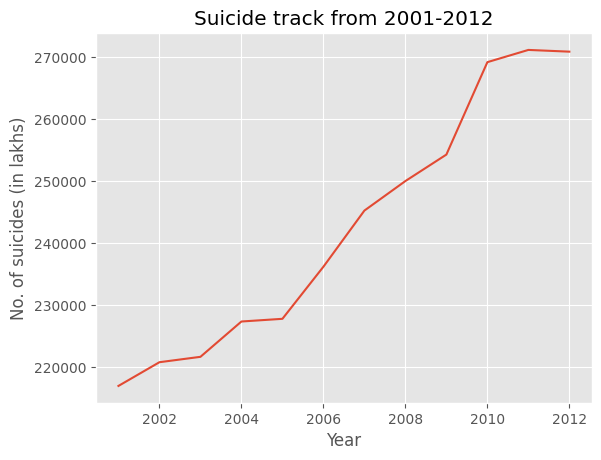

In [21]:
plt.plot(suicides.loc[suicides.State=="Total (All India)"].groupby('Year').Total.sum())
plt.title('Suicide track from 2001-2012')
plt.xlabel('Year')
plt.ylabel('No. of suicides (in lakhs)')
#plt.ticklabel_format(style='plain')  # for removing the scientific notation

## Gender wise suicide track

In [22]:
p=suicides.groupby('Gender').Total.sum()
p

Gender
Female    4702974
Male      8368760
Name: Total, dtype: int64

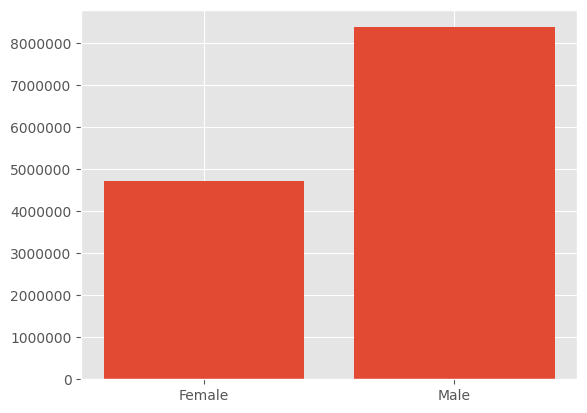

In [23]:
plt.bar(['Female','Male'],height=p)
plt.ticklabel_format(axis='y',style='plain')

## State-wise suicide track

In [24]:
suicides.State.str.strip()

0         A & N Islands
1         A & N Islands
2         A & N Islands
3         A & N Islands
4         A & N Islands
              ...      
237514      West Bengal
237515      West Bengal
237516      West Bengal
237517      West Bengal
237518      West Bengal
Name: State, Length: 237519, dtype: object

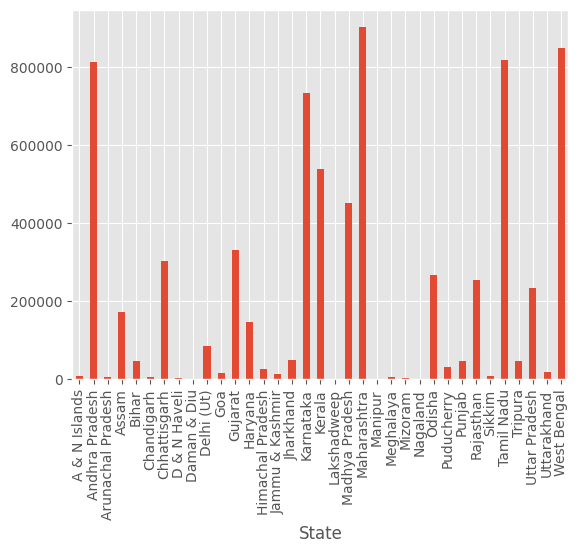

In [25]:
state_wise=suicides.groupby('State').Total.sum()
state_wise.drop(["Total (All India)","Total (States)","Total (Uts)"], inplace=True)
state_wise.plot.bar()
plt.ticklabel_format(axis='y',style='plain')

## Social Status wise track

In [26]:
Social_Status=suicides.loc[suicides.Type_code=='Social_Status']

In [27]:
print(Social_Status.head())
Social_Status.shape
#Social_Status.drop(['Type_code','Age_group','Year','Gender'],axis=1,inplace=True)

             State  Year      Type_code             Type  Gender Age_group  \
552  A & N Islands  2001  Social_Status          Married  Female    0-100+   
553  A & N Islands  2001  Social_Status        Seperated  Female    0-100+   
554  A & N Islands  2001  Social_Status  Widowed/Widower  Female    0-100+   
555  A & N Islands  2001  Social_Status         Divorcee  Female    0-100+   
556  A & N Islands  2001  Social_Status    Never Married  Female    0-100+   

     Total  
552     38  
553      0  
554      0  
555      0  
556     12  


(4560, 7)

In [28]:
Social_Status.index=[i for i in range(1,4561,1)]
Social_Status.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
1,A & N Islands,2001,Social_Status,Married,Female,0-100+,38
2,A & N Islands,2001,Social_Status,Seperated,Female,0-100+,0
3,A & N Islands,2001,Social_Status,Widowed/Widower,Female,0-100+,0
4,A & N Islands,2001,Social_Status,Divorcee,Female,0-100+,0
5,A & N Islands,2001,Social_Status,Never Married,Female,0-100+,12


In [29]:
Social_Status.groupby('Type').Total.sum().to_dict()

{'Divorcee': 45816,
 'Married': 3065322,
 'Never Married': 954903,
 'Seperated': 115413,
 'Widowed/Widower': 186339}

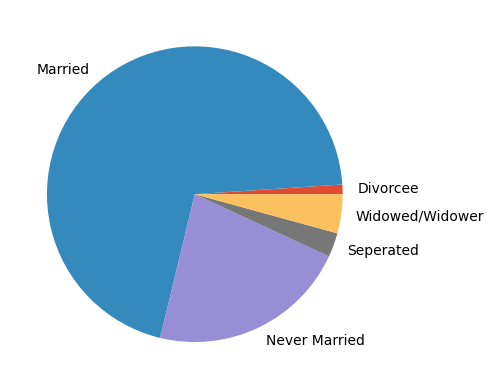

In [30]:
plt.pie(Social_Status.groupby('Type').Total.sum(),labels=Social_Status.groupby('Type').Total.sum().to_dict().keys())
plt.ticklabel_format()

## Cause of suicide for different Age Group

In [31]:
Causes=suicides.loc[suicides.Type_code=='Causes']
Causes.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [32]:
print(Causes.shape)
Causes.index=[i for i in  range(1,109201)]
Causes.head()
#x=(suicides.dtypes=='object')
#x[x].index

(109200, 7)


,State,Year,Type_code,Type,Gender,Age_group,Total
1,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
2,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
3,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
4,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
5,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [33]:
Cause_list=suicides.Type.loc[suicides.Type_code=='Causes'].unique().tolist()

In [34]:
Cause_series=pd.Series(Causes.Type.unique())
for Cause in Cause_list:
    fuzzymatching(Cause,Cause_series)

{'Illness (Aids/STD)': 'Illness (Aids/STD)'}
{'Bankruptcy or Sudden change in Economic': 'Bankruptcy or Sudden change in Economic Status'}
{'Cancellation/Non-Settlement of Marriage': 'Cancellation/Non-Settlement of Marriage'}
{'Physical Abuse (Rape/Incest Etc.)': 'Physical Abuse (Rape/Incest Etc.)'}
{'Dowry Dispute': 'Dowry Dispute'}
{'Family Problems': 'Family Problems'}
{'Ideological Causes/Hero Worshipping': 'Ideological Causes/Hero Worshipping'}
{'Other Prolonged Illness': 'Other Prolonged Illness'}
{'Property Dispute': 'Property Dispute'}
{'Fall in Social Reputation': 'Fall in Social Reputation'}
{'Illegitimate Pregnancy': 'Illegitimate Pregnancy'}
{'Failure in Examination': 'Failure in Examination'}
{'Insanity/Mental Illness': 'Insanity/Mental Illness'}
{'Love Affairs': 'Love Affairs'}
{'Professional/Career Problem': 'Professional/Career Problem'}
{'Divorce': 'Divorce'}
{'Drug Abuse/Addiction': 'Drug Abuse/Addiction'}
{'Not having Children(Barrenness/Impotency': 'Not having Child

In [35]:
Causes.Type.loc[Causes.Type=='Bankruptcy or Sudden change in Economic']='Bankruptcy or Sudden change in Economic Status'
Causes.Type.loc[Causes.Type=='Not having Children (Barrenness/Impotency']='Not having Children(Barrenness/Impotency'
Causes.Type.loc[Causes.Type=='Causes Not known']='Other Causes'
Causes.Type.loc[Causes.Type=='Other Causes (Please Specity)']='Other Causes'

C:\Users\sarth\AppData\Local\Temp\ipykernel_3748\1693546739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Causes.Type.loc[Causes.Type=='Bankruptcy or Sudden change in Economic']='Bankruptcy or Sudden change in Economic Status'
C:\Users\sarth\AppData\Local\Temp\ipykernel_3748\1693546739.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Causes.Type.loc[Causes.Type=='Not having Children (Barrenness/Impotency']='Not having Children(Barrenness/Impotency'
C:\Users\sarth\AppData\Local\Temp\ipykernel_3748\1693546739.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

In [36]:
Causes.Type.unique()

array(['Illness (Aids/STD)',
       'Bankruptcy or Sudden change in Economic Status',
       'Cancellation/Non-Settlement of Marriage',
       'Physical Abuse (Rape/Incest Etc.)', 'Dowry Dispute',
       'Family Problems', 'Ideological Causes/Hero Worshipping',
       'Other Prolonged Illness', 'Property Dispute',
       'Fall in Social Reputation', 'Illegitimate Pregnancy',
       'Failure in Examination', 'Insanity/Mental Illness',
       'Love Affairs', 'Professional/Career Problem', 'Divorce',
       'Drug Abuse/Addiction', 'Not having Children(Barrenness/Impotency',
       'Other Causes', 'Unemployment', 'Poverty', 'Death of Dear Person',
       'Cancer', 'Suspected/Illicit Relation', 'Paralysis'], dtype=object)

In [37]:
#Causes.Type.astype('str')
Type_Causes=Causes.groupby('Type').Total.sum()
Type_Causes

Type
Bankruptcy or Sudden change in Economic Status     35410
Cancellation/Non-Settlement of Marriage            11296
Cancer                                              9058
Death of Dear Person                               10321
Divorce                                             4133
Dowry Dispute                                      31970
Drug Abuse/Addiction                               30046
Failure in Examination                             27005
Fall in Social Reputation                          13464
Family Problems                                   341952
Ideological Causes/Hero Worshipping                 2118
Illegitimate Pregnancy                              2494
Illness (Aids/STD)                                  8723
Insanity/Mental Illness                            94229
Love Affairs                                       45039
Not having Children(Barrenness/Impotency            8588
Other Causes                                      453119
Other Prolonged Illness   

Text(0.5, 1.0, 'Causes of Suicides')

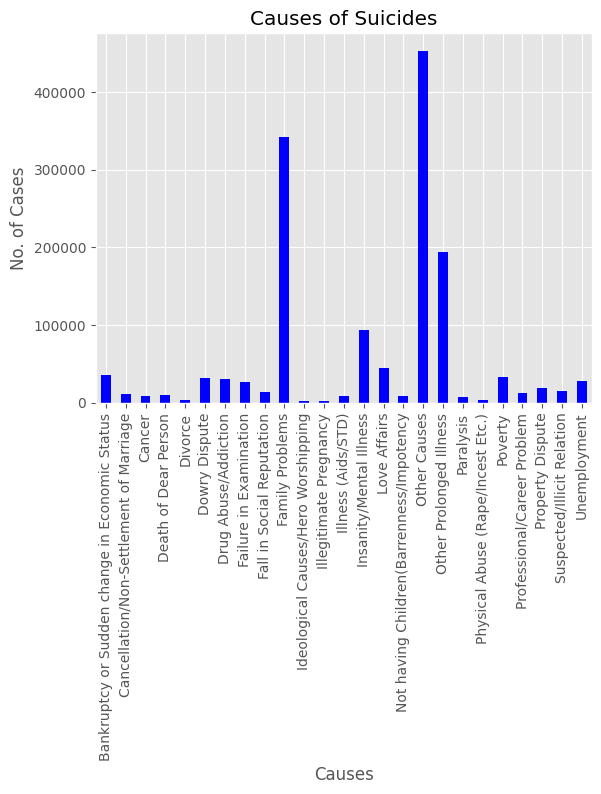

In [38]:
Type_Causes.plot.bar(color='blue')
plt.xlabel('Causes')
plt.ylabel('No. of Cases')
plt.title('Causes of Suicides')

In [39]:
Causes.groupby(['Age_group','Type']).Total.sum()

Age_group  Type                                          
0-14       Bankruptcy or Sudden change in Economic Status     124
           Cancellation/Non-Settlement of Marriage             49
           Cancer                                              34
           Death of Dear Person                               267
           Divorce                                              5
                                                             ... 
60+        Poverty                                           2589
           Professional/Career Problem                        560
           Property Dispute                                  1425
           Suspected/Illicit Relation                         134
           Unemployment                                       378
Name: Total, Length: 125, dtype: int64

In [40]:
Causes.Age_group.unique()

array(['0-14', '15-29', '30-44', '45-59', '60+'], dtype=object)

### '0-14'  Age Group

In [41]:
Causes_child=Causes.groupby('Type').apply(lambda Causes:Causes.loc[Causes.Age_group=='0-14'].Total.sum())
Causes_child

Type
Bankruptcy or Sudden change in Economic Status      124
Cancellation/Non-Settlement of Marriage              49
Cancer                                               34
Death of Dear Person                                267
Divorce                                               5
Dowry Dispute                                       191
Drug Abuse/Addiction                                114
Failure in Examination                             4264
Fall in Social Reputation                           169
Family Problems                                    4254
Ideological Causes/Hero Worshipping                  34
Illegitimate Pregnancy                               67
Illness (Aids/STD)                                  105
Insanity/Mental Illness                            1223
Love Affairs                                       1250
Not having Children(Barrenness/Impotency             31
Other Causes                                      17359
Other Prolonged Illness                    

Text(0.5, 1.0, 'Causes behind suicides of Children')

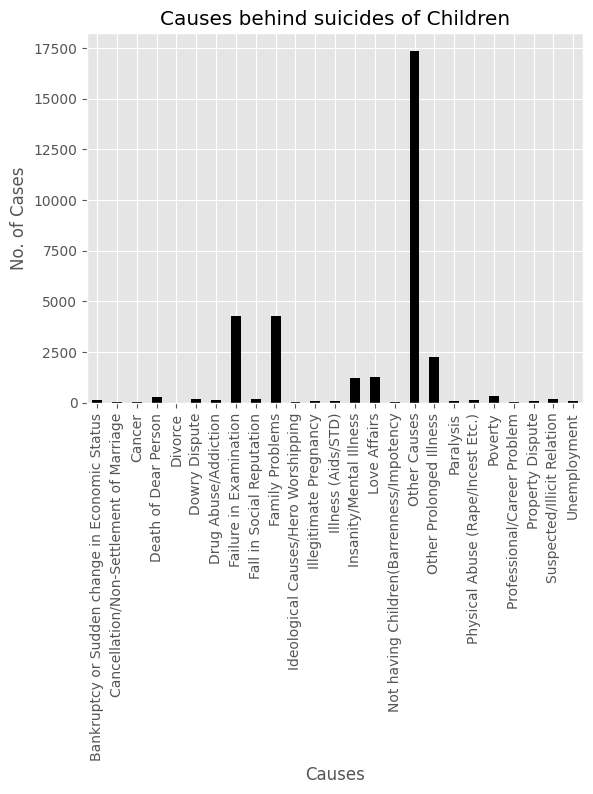

In [42]:
Causes_child.plot.bar(color='black')
plt.xlabel('Causes')
plt.ylabel('No. of Cases')
plt.title('Causes behind suicides of Children')

### '15-29' Age Group

In [43]:
Causes_young=Causes.groupby('Type').apply(lambda Causes:Causes.loc[Causes.Age_group=='15-29'].Total.sum())
Causes_young

Type
Bankruptcy or Sudden change in Economic Status      6265
Cancellation/Non-Settlement of Marriage             7703
Cancer                                               922
Death of Dear Person                                3420
Divorce                                             1552
Dowry Dispute                                      23020
Drug Abuse/Addiction                                7378
Failure in Examination                             21328
Fall in Social Reputation                           4719
Family Problems                                   121427
Ideological Causes/Hero Worshipping                  825
Illegitimate Pregnancy                              1702
Illness (Aids/STD)                                  2414
Insanity/Mental Illness                            27259
Love Affairs                                       33023
Not having Children(Barrenness/Impotency            3097
Other Causes                                      154483
Other Prolonged Illness   

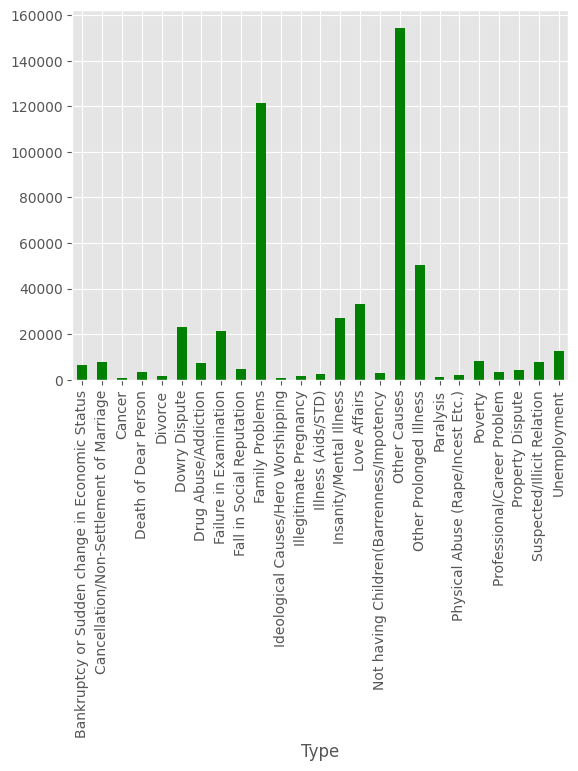

In [44]:
Causes_young.plot.bar(color='green')
plt.ticklabel_format(axis='y',style='plain')

### '30-44' Age Group

In [45]:
Causes_adult=Causes.groupby('Type').apply(lambda Causes:Causes.loc[Causes.Age_group=='30-44'].Total.sum())

In [46]:
Causes_adult

Type
Bankruptcy or Sudden change in Economic Status     14675
Cancellation/Non-Settlement of Marriage             3055
Cancer                                              2538
Death of Dear Person                                3364
Divorce                                             1904
Dowry Dispute                                       8098
Drug Abuse/Addiction                               13123
Failure in Examination                              1254
Fall in Social Reputation                           4963
Family Problems                                   125135
Ideological Causes/Hero Worshipping                  723
Illegitimate Pregnancy                               654
Illness (Aids/STD)                                  3503
Insanity/Mental Illness                            32506
Love Affairs                                        9866
Not having Children(Barrenness/Impotency            4056
Other Causes                                      154083
Other Prolonged Illness   

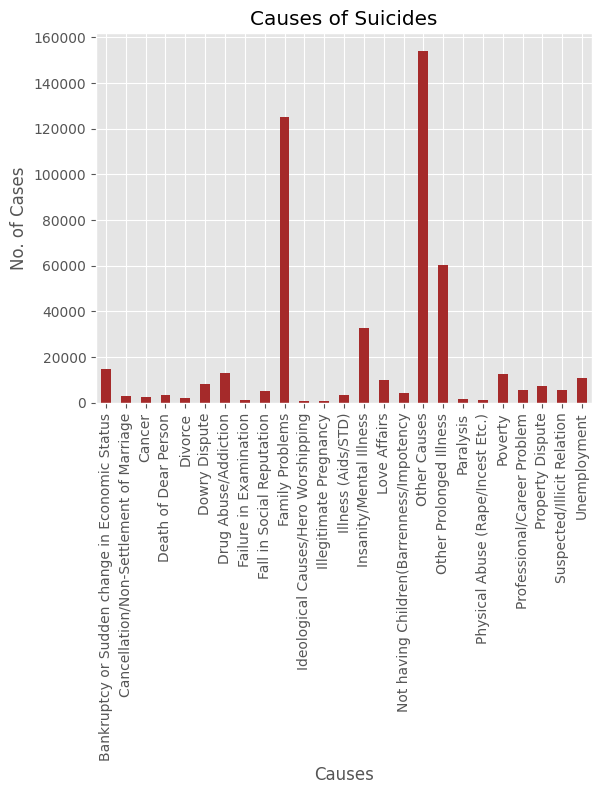

In [47]:
Causes_adult.plot.bar(color='brown')
plt.xlabel('Causes')
plt.ylabel('No. of Cases')
plt.title('Causes of Suicides')
plt.ticklabel_format(axis='y',style='plain')

### '45-59' Age Group

In [48]:
Causes_adult1=Causes.groupby('Type').apply(lambda Causes:Causes.loc[Causes.Age_group=='45-59'].Total.sum())

In [49]:
Causes_adult1

Type
Bankruptcy or Sudden change in Economic Status    11219
Cancellation/Non-Settlement of Marriage             439
Cancer                                             3502
Death of Dear Person                               2204
Divorce                                             615
Dowry Dispute                                       629
Drug Abuse/Addiction                               7581
Failure in Examination                              145
Fall in Social Reputation                          2809
Family Problems                                   69465
Ideological Causes/Hero Worshipping                 425
Illegitimate Pregnancy                               69
Illness (Aids/STD)                                 1863
Insanity/Mental Illness                           22748
Love Affairs                                        862
Not having Children(Barrenness/Impotency           1269
Other Causes                                      92348
Other Prolonged Illness                    

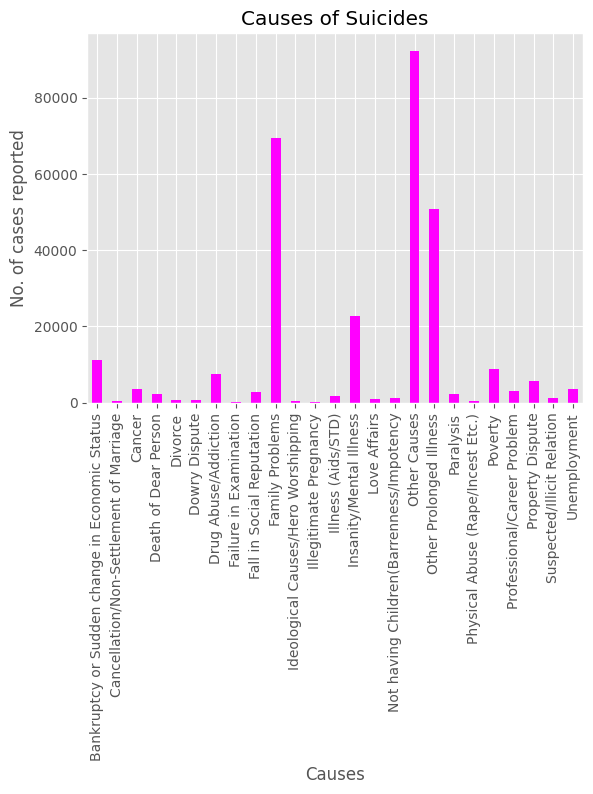

In [50]:
Causes_adult1.plot.bar(color='magenta')
plt.xlabel('Causes')
plt.ylabel('No. of cases reported')
plt.title('Causes of Suicides')
plt.ticklabel_format(axis='y',style='plain')

### '60+' Age Group 

In [51]:
Causes_old=Causes.groupby('Type').apply(lambda Causes:Causes.loc[Causes.Age_group=='60+'].Total.sum())

In [52]:
Causes_old

Type
Bankruptcy or Sudden change in Economic Status     3127
Cancellation/Non-Settlement of Marriage              50
Cancer                                             2062
Death of Dear Person                               1066
Divorce                                              57
Dowry Dispute                                        32
Drug Abuse/Addiction                               1850
Failure in Examination                               14
Fall in Social Reputation                           804
Family Problems                                   21671
Ideological Causes/Hero Worshipping                 111
Illegitimate Pregnancy                                2
Illness (Aids/STD)                                  838
Insanity/Mental Illness                           10493
Love Affairs                                         38
Not having Children(Barrenness/Impotency            135
Other Causes                                      34846
Other Prolonged Illness                    

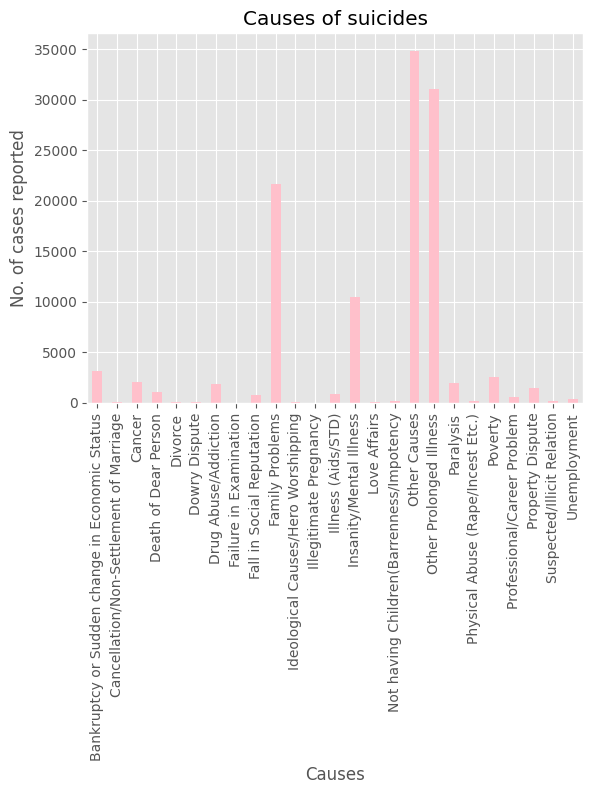

In [53]:
Causes_old.plot.bar(color='pink')
plt.xlabel('Causes')
plt.ylabel('No. of cases reported')
plt.title('Causes of suicides')
plt.ticklabel_format()

In [54]:
Age_wise=suicides.groupby('Age_group').Total.sum()

In [55]:
Age_wise

Age_group
0-100+    8735586
0-14        98410
15-29     1534037
30-44     1471599
45-59      885177
60+        346925
Name: Total, dtype: int64

In [56]:
Age_wise.drop('0-100+',inplace=True)

In [57]:
Age_wise

Age_group
0-14       98410
15-29    1534037
30-44    1471599
45-59     885177
60+       346925
Name: Total, dtype: int64

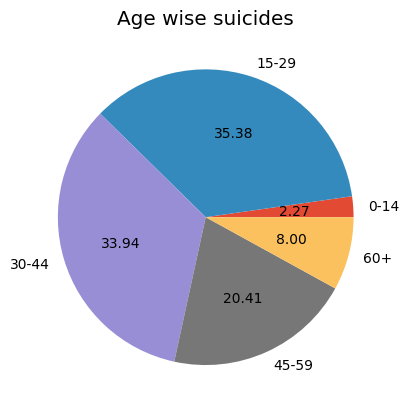

In [58]:
Age_wise.plot.pie(autopct='%0.2f')
plt.ylabel(None)
plt.title('Age wise suicides')
plt.ticklabel_format()

## Education level of people commiting suicides

In [59]:
Education_Status= suicides.loc[suicides['Type_code']=='Education_Status']
Education_Status

,State,Year,Type_code,Type,Gender,Age_group,Total
260,A & N Islands,2001,Education_Status,Diploma,Female,0-100+,0
261,A & N Islands,2001,Education_Status,No Education,Female,0-100+,4
262,A & N Islands,2001,Education_Status,Post Graduate and Above,Female,0-100+,0
263,A & N Islands,2001,Education_Status,Middle,Female,0-100+,33
264,A & N Islands,2001,Education_Status,Graduate,Female,0-100+,0
...,...,...,...,...,...,...,...
237234,West Bengal,2012,Education_Status,Primary,Male,0-100+,2983
237235,West Bengal,2012,Education_Status,No Education,Male,0-100+,1096
237236,West Bengal,2012,Education_Status,Middle,Male,0-100+,2467
237237,West Bengal,2012,Education_Status,Graduate,Male,0-100+,242


In [60]:
Education_Status.shape

(7296, 7)

In [61]:
Education_Status.index=(i for i in range(1,7297))

In [62]:
Education_Status.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
1,A & N Islands,2001,Education_Status,Diploma,Female,0-100+,0
2,A & N Islands,2001,Education_Status,No Education,Female,0-100+,4
3,A & N Islands,2001,Education_Status,Post Graduate and Above,Female,0-100+,0
4,A & N Islands,2001,Education_Status,Middle,Female,0-100+,33
5,A & N Islands,2001,Education_Status,Graduate,Female,0-100+,0


In [63]:
Edu_series=Education_Status.groupby('Type').Total.sum()
Edu_series

Type
Diploma                                       42459
Graduate                                      93822
Hr. Secondary/Intermediate/Pre-Universit     356724
Matriculate/Secondary                        769698
Middle                                      1028913
No Education                                 965271
Post Graduate and Above                       22425
Primary                                     1088481
Name: Total, dtype: int64

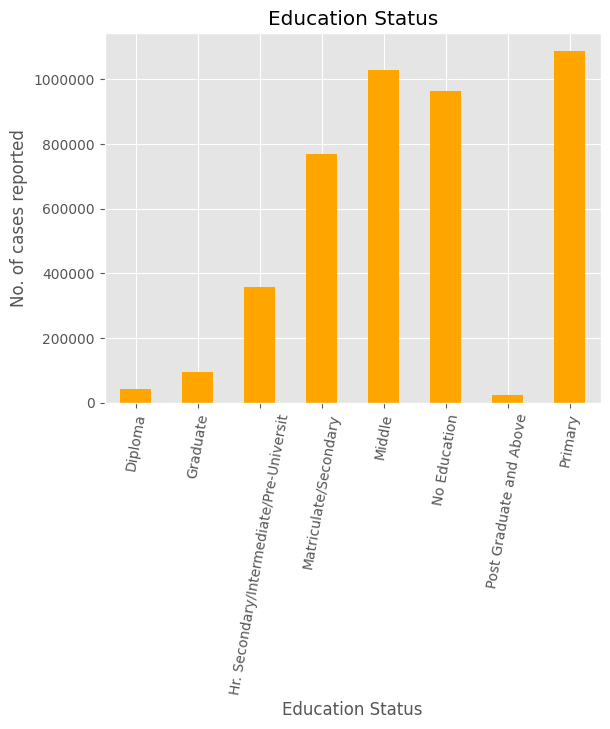

In [64]:
Edu_series.plot.bar(color='orange')
plt.xlabel("Education Status")
plt.ylabel("No. of cases reported")
plt.xticks(rotation=80)
plt.title('Education Status')
plt.ticklabel_format(axis='y',style='plain')

## Professional Profile wise analysis

In [65]:
Professional_Profile=suicides.loc[suicides.Type_code=='Professional_Profile']

In [66]:
Professional_Profile.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
436,A & N Islands,2001,Professional_Profile,Retired Person,Female,0-14,0
437,A & N Islands,2001,Professional_Profile,Unemployed,Female,0-14,0
438,A & N Islands,2001,Professional_Profile,Public Sector Undertaking,Female,0-14,0
439,A & N Islands,2001,Professional_Profile,Service (Private),Female,0-14,0
440,A & N Islands,2001,Professional_Profile,House Wife,Female,0-14,0


In [67]:
Professional_Profile.shape

(49263, 7)

In [68]:
Professional_Profile.index=(i for i in range(1,49264))
Professional_Profile.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
1,A & N Islands,2001,Professional_Profile,Retired Person,Female,0-14,0
2,A & N Islands,2001,Professional_Profile,Unemployed,Female,0-14,0
3,A & N Islands,2001,Professional_Profile,Public Sector Undertaking,Female,0-14,0
4,A & N Islands,2001,Professional_Profile,Service (Private),Female,0-14,0
5,A & N Islands,2001,Professional_Profile,House Wife,Female,0-14,0


In [69]:
Professional_level=Professional_Profile.groupby('Type').Total.sum()
Professional_level

Type
Farming/Agriculture Activity         197923
House Wife                           285243
Others (Please Specify)              469147
Professional Activity                 39204
Public Sector Undertaking             30786
Retired Person                        11334
Self-employed (Business activity)     78112
Service (Government)                  23325
Service (Private)                    115472
Student                               74323
Unemployed                           114374
Name: Total, dtype: int64

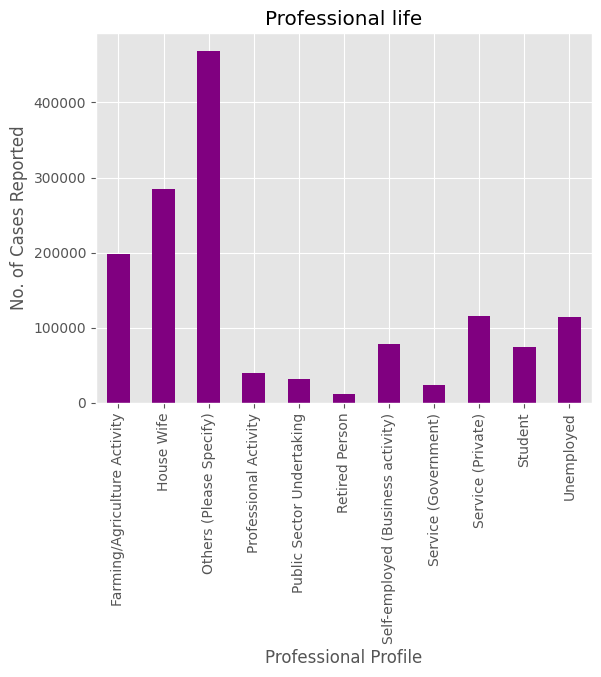

In [70]:
Professional_level.plot.bar(color='purple')
plt.xlabel("Professional Profile")
plt.ylabel("No. of Cases Reported")
plt.title("Professional life")
plt.ticklabel_format()

## Various means adopted by people

In [71]:
Means_adopted=suicides.loc[suicides.Type_code=='Means_adopted']

In [72]:
Means_adopted

,State,Year,Type_code,Type,Gender,Age_group,Total
276,A & N Islands,2001,Means_adopted,By Consuming Insecticides,Female,0-14,0
277,A & N Islands,2001,Means_adopted,By Hanging,Female,0-14,2
278,A & N Islands,2001,Means_adopted,By Jumping from (Other sites),Female,0-14,0
279,A & N Islands,2001,Means_adopted,By touching electric wires,Female,0-14,0
280,A & N Islands,2001,Means_adopted,By Machine,Female,0-14,0
...,...,...,...,...,...,...,...
237394,West Bengal,2012,Means_adopted,By Consuming Insecticides,Male,60+,53
237395,West Bengal,2012,Means_adopted,By Other means (please specify),Male,60+,241
237396,West Bengal,2012,Means_adopted,By Consuming Other Poison,Male,60+,99
237397,West Bengal,2012,Means_adopted,By Fire/Self Immolation,Male,60+,21


In [73]:
Means_adopted.index=(i for i in range(1,67201))

In [74]:
Means_adopted.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
1,A & N Islands,2001,Means_adopted,By Consuming Insecticides,Female,0-14,0
2,A & N Islands,2001,Means_adopted,By Hanging,Female,0-14,2
3,A & N Islands,2001,Means_adopted,By Jumping from (Other sites),Female,0-14,0
4,A & N Islands,2001,Means_adopted,By touching electric wires,Female,0-14,0
5,A & N Islands,2001,Means_adopted,By Machine,Female,0-14,0


In [75]:
Means_adopted.groupby('Type').Total.sum()

Type
By Consuming Insecticides                  275501
By Consuming Other Poison                  231178
By Drowning                                 96711
By Fire-Arms                                 6294
By Fire/Self Immolation                    128006
By Hanging                                 460955
By Jumping from (Building)                   7871
By Jumping from (Other sites)                8127
By Jumping off Moving Vehicles/Trains        8116
By Machine                                   1661
By Other means                               9238
By Other means (please specify)            135132
By Over Alcoholism                          15973
By Overdose of sleeping pills                9960
By Self Infliction of injury                 5093
By coming under running vehicles/trains     45299
By touching electric wires                  10816
Name: Total, dtype: int64

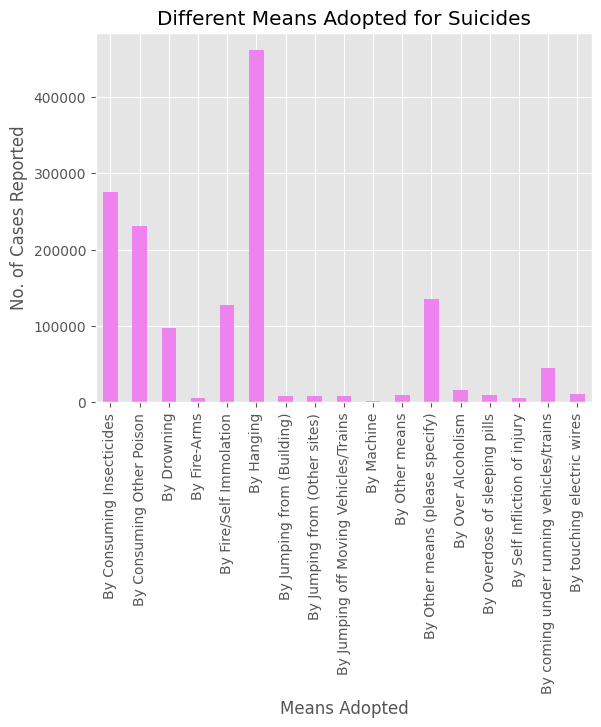

In [76]:
ma=Means_adopted.groupby('Type').Total.sum()
ma.plot.bar(color='violet')
plt.xlabel('Means Adopted')
plt.ylabel('No. of Cases Reported')
plt.title("Different Means Adopted for Suicides")
plt.ticklabel_format()

In [77]:

#Conclusion:
#1. There is overall increase in total number of suicide cases since 2001 to 2012.
#2. Number of suicide cases of males are much greater than those of females.
#3. Highest number of suicide cases are reported in Maharastra, followed by West Bengal, Tamil Nadu and Andra Pradesh. 
#4. Most of the people committed suicide were married.
#5. Cause of suicide of majority people is not related to their personal problems or if it is, it isn't mentioned in our dataset.
#    This was same for all age groups.
#6. Among the known Causes, major reason can be traced as family problems followed by other prolonged illness.
#7. Apart from other causes, a good chunk of children commits suicide due to failure in examnination followed by family problems.
#8. A significant number of people belonging to '15-29','30-44', '45-59' and '60+' age groups people commit suicide due to
#    family problems and prolonged illness(apart from cancer and paralysis).
#9. However, insanity/mental illness is also becomes one of the significant driving force behined this act.
#10. Majority of the people commited suicide were youth. Majority of them falling in age group of '15-29' followed by '30-44' and
#    '45-59' simultaneously. 
#11. Majority of people committed suicide had very little or no education at all. Many of them having just primary, middle level
#     or secondary education.
#12. Most of these people dosen't had widely accepted profession in society. Majority of these women were also housewife.
#13. Majority of people commit suicide by hanging. However, consuming insecticided, poison, self-immolation/fire, drowning,
#     comming under running vehicle are other common methods of suicides used.